<a href="https://colab.research.google.com/github/ShreyoshiGhosh/PRODIGY_DS_02/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


**LOADING DATASET**

In [2]:
dataset = pd.read_csv('/content/train.csv')

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [6]:
#performing data cleaning
print(dataset.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
dataset['Age'].fillna(dataset['Age'].median(), inplace=True)

In [8]:
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

In [9]:
dataset.drop(columns=['PassengerId', 'Name','Ticket','Cabin'], inplace=True)

In [10]:
### For plotting purposes, divide the data into two sets
# number of unique elements <= 6
cols_smaller_than_6 = [col for col in dataset.columns if dataset[col].nunique() <= 6]
print(cols_smaller_than_6)

# number of unique elements > 6
cols_greater_than_6 = [col for col in dataset.columns if dataset[col].nunique() > 6]
print(cols_greater_than_6)

['Survived', 'Pclass', 'Sex', 'Embarked']
['Age', 'SibSp', 'Parch', 'Fare']


<ipython-input-11-0ce11f01bb00>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(2, 2, i)
<ipython-input-11-0ce11f01bb00>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataset[col].astype('object'), ax=ax, palette = 'viridis')
<ipython-input-11-0ce11f01bb00>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataset[col].astype('object'), ax=ax, palette = 'viridis')
<ipython-input-11-0ce11f01bb00>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` an

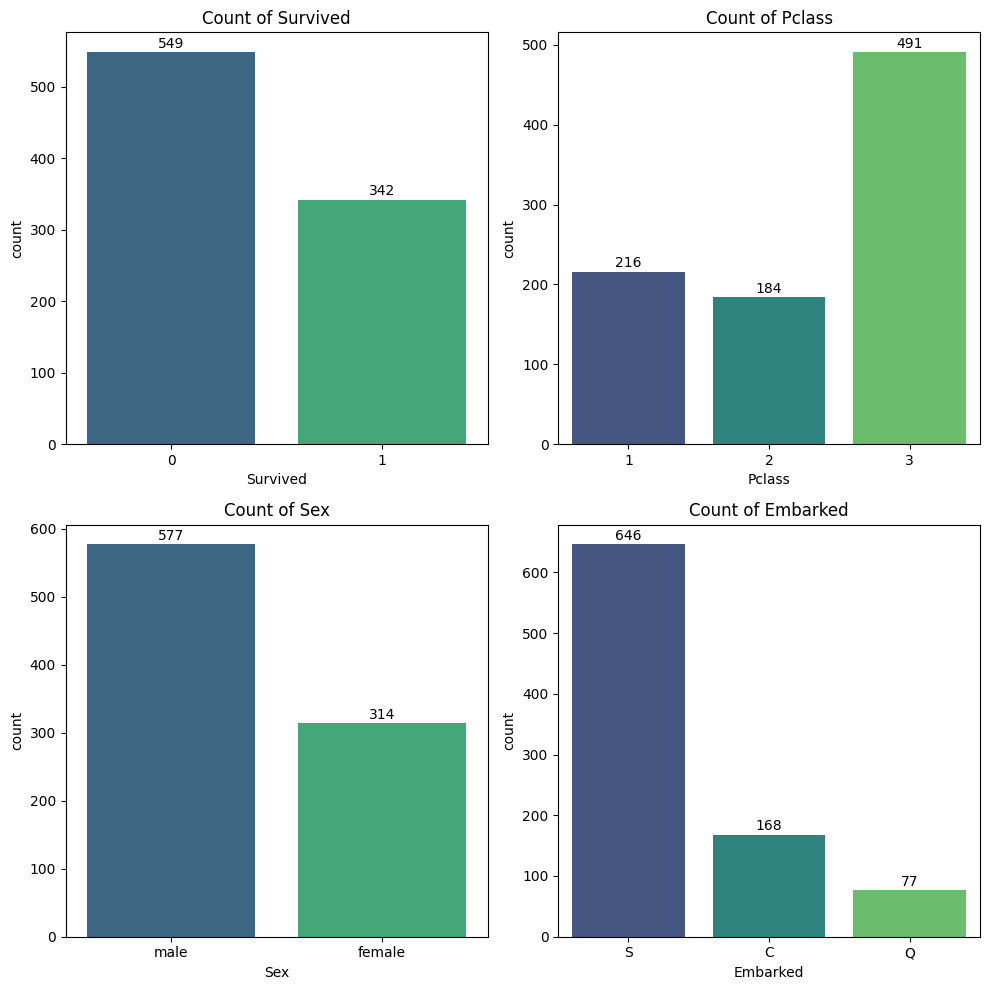

In [11]:
fig, ax = plt.subplots(figsize=(10,10))

for i, col in enumerate(cols_smaller_than_6, 1):

    ax = plt.subplot(2, 2, i)

    sns.countplot(x=dataset[col].astype('object'), ax=ax, palette = 'viridis')
    plt.title(f'Count of {col}')

    for c in ax.containers:
        ax.bar_label(c, fmt='%d', padding=1)

    # ax.remove()

plt.tight_layout()
plt.show()

# Explicitly close the figure to remove overlapping axes
plt.close(fig)

<ipython-input-12-d8d5004ede3d>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, i)


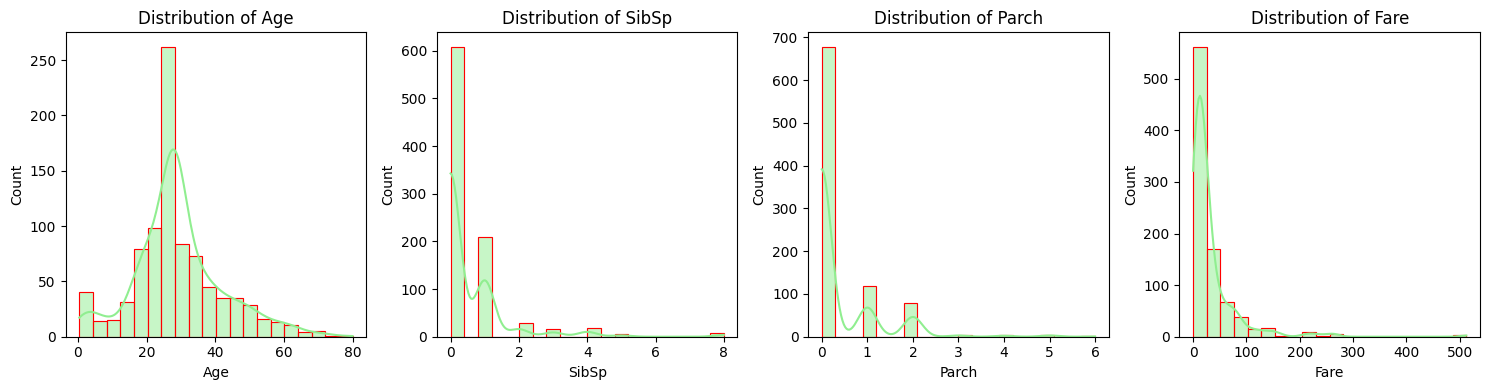

In [12]:
fig, ax = plt.subplots(figsize=(15, 4))

for i, col in enumerate(cols_greater_than_6, 1):
    plt.subplot(1, 4, i)
    sns.histplot(x=dataset[col], bins=20, kde=True, color = 'lightgreen', edgecolor = 'red')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()